In [1]:
###################################################
##This file is used to parse the JSON file and extract the
#data and save in lists.
#The lists can be used as params to be passed to the http://neurosynth.org/api/v2/ API

# NCBI Hackathon Team: brainimages


####################################################

"""
    Import all the modules
"""

import urllib
import json
import requests
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import requests
import shutil

####################################################
"""
All function definitions are here
"""

def get_neurosynth(url, querytype, query):
    """
    Function definition for querying Neurosynth API
    This function used to query the Neurosynth API, with input parameters as lists that
    contain the keys and values obtained from EMR data.
    Input: url; querytype for e.g. 'locations', 'images', 'gene' etc; query:values obtained from parsed
    files.

    Output: Output from Neurosynth query

    Parameters
    ----------
    param1 : str
        This is a link for Neurosynth API.
    param2 : str
        The querytype for e.g. 'locations', 'images', 'gene'
    param3 : list
        These are list of parameter values obtained from a parsed list from EMR

    Returns
    -------
    Query results from Neurosynth API

    """
    if querytype == 'locations':
        result = requests.get(url+querytype+'/', params=query)
        #return result.url #Checks the url
        return result.content
    elif querytype == 'symptom':
        result = requests.get(url+querytype+'/', params=query)
        return result.content
    elif querytype == 'decode':
        result = requests.get(url+querytype+'/', params=query)
        return result.content
    elif querytype == 'images':
        result = requests.get(url+querytype+'/', params=query)
        return result.content


def parse_decoder_output(data):
    """
    This function takes the output of a neurosynth decoder querry
    It parses the output and returns a key-value pairing where the keys are the neurosynth terms, and values are correlations
    """
    termas = data.split('values')[1]
    termn = ''.join(termas).split('\n')
    dicionarios = [i.split(':') for i in termn]
    d = dicionarios[1:-1]
    my_dict = {}
    for i in range(len(d)):
        term = d[i][0].split('"')[1]
        cor = float(d[i][1].split(',')[0])
        my_dict[term] = cor
    return my_dict

def parse_image_url(term_decode):
    """
    This function takes the contents of a term querry and returns the id corresponding to the image map
    """
    a = term_decode.decode("utf-8")
    b = a.split("id")
    b1 = b[1].split('\n')[0].split()[1].split(',')[0]
    b2 = b[2].split('\n')[0].split()[1].split(',')[0]
    return b1, b2

def download_file(url):
    local_filename = url.split('/')[-1]
    r = requests.get(url, stream=True)
    with open(local_filename, 'wb') as f:
        shutil.copyfileobj(r.raw, f)

    return local_filename


####################################################

#Opens the json file
with open('data.json') as data_file:
    data = json.load(data_file)

#print(len(data['parameters']))

#Creates an array for x, y and z locations as required
#x = [];
#for i in range(len(data['parameters'])):
    #x.append(data['parameters'][i]['id'])
#print(x)


####################################################

['valore', 'valore_new']


In [2]:
####################################################

"""
    Queries terms are here
"""

#Location query
voxel_list = {'x':'2', 'y':'4', 'z':'5'}

#Terms query
url ='http://neurosynth.org/api/v2/'
# The url2 link is a link to be used in Neuro image decoder
url2 = {'url':'https%3A%2F%2Fneurovault.org%2Fmedia%2Fimages%2F2531%2Fphon_diff_fwe.nii.gz'}
#This makes it url safe and avoids the % addition from python
urls = "&".join("%s=%s" % (k,v) for k,v in url2.items())

# Image query
url_image = "http://neurosynth.org/images/"

terms_tobequeried = {'search':'broca'} # can be a list of strings

################################

In [4]:
################################
"""
    Test queries are here
"""

#Test data set (1 location) with function call to get_neurosynth
#url2 = https://neurovault.org/media/images/2531/phon_diff_fwe.nii.gz
#data_new = get_neurosynth(url, 'locations', voxel_list)

# Given images, find the terms
#print(urls)
image_decode = get_neurosynth(url,'decode', urls).decode("utf-8")

# Output from image decoder function within Neurosynth
#print(image_decode)


# Given terms, find images
term_decode = get_neurosynth(url,'images', terms_tobequeried) 
#print(term_decode)


#Importing the image that was queried from an example term
#image is stored in a file called 601, which is the image id
id1, id2 = parse_image_url(term_decode)
image_number = id1
mu = url_image + image_number
download_file(mu)



################################

'601'

In [7]:
################################

"""
    Text file with all the parsed terms 
"""

my_dict = parse_decoder_output(image_decode)
#print(my_dict)
#cors = np.array(list(my_dict.values()))

#plt.hist(cors, 50)
#plt.show()


################################

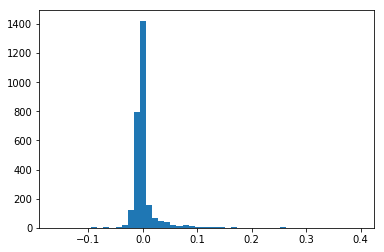

In [8]:
################################
"""
    Plots are here
"""

cors = np.array(list(my_dict.values()))
plt.hist(cors, 50)
plt.show()

################################